In [1]:
import model_loader # 其中调用了全部扩散模型模块
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = 'cpu'
ALLOW_CUDA = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = 'cuda'

print(f"Using device : {DEVICE}")

Using device : cpu


### 加载模型与外部Tokenizer
- 由model_loader建立模型

In [2]:
tokenizer = CLIPTokenizer("../data/vocab.json",merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file,DEVICE)

c:\Users\GameDesign\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 文生图

In [4]:
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = " "
do_cfg = True
cfg_scale = 8
### 以下为了兼容图生图
input_image = None
strength = 1

### 图生图

In [ ]:
# image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# strength = 0.9

### 确定采样器并调用管线

100%|██████████| 50/50 [07:14<00:00,  8.70s/it]


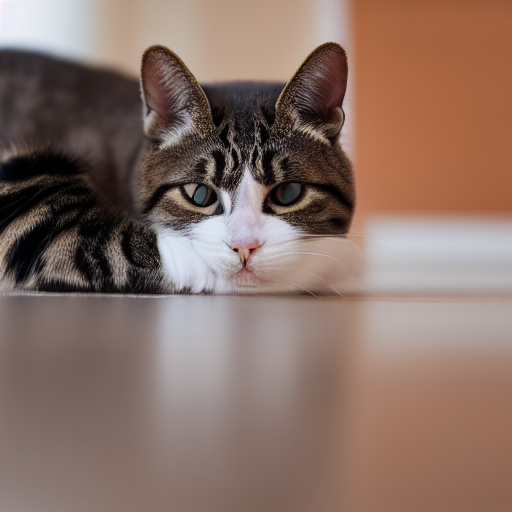

In [5]:
sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)